In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
x0=0.25
p0=0.05
hbar=0.004
re_co=x0/np.sqrt(2*hbar)
im_co=p0/np.sqrt(2*hbar)
N=50
psi0=coherent(N,re_co+1j*im_co)

In [2]:
H0=-1*hbar*(create(N)**2+destroy(N)**2)/2+(hbar**2/16)*(create(N)+destroy(N))**4
H1=-1*np.sqrt(hbar/2)*(create(N)+destroy(N))
H0=H0/hbar
H1=H1/hbar

In [19]:
F=0.015
w=1
gamma=0.1
T=2*np.pi/w
args={'F':F,'w':w}
kT=2*hbar
nbar=0#1/(np.exp(hbar/kT)-1)
print(nbar)

0


In [20]:
H=[H0,[H1,'F*cos(w*t)']]

In [21]:
times=np.arange(0,300*T,0.1)

In [22]:
result=mesolve(H,psi0,times,[np.sqrt(gamma*(1+nbar))*destroy(N),np.sqrt(gamma*nbar)*create(N)],[],args=args,progress_bar=True)

10.0%. Run time:  10.79s. Est. time left: 00:00:01:37
20.0%. Run time:  31.08s. Est. time left: 00:00:02:04
30.0%. Run time:  41.41s. Est. time left: 00:00:01:36
40.0%. Run time:  62.59s. Est. time left: 00:00:01:33
50.0%. Run time:  81.36s. Est. time left: 00:00:01:21
60.0%. Run time:  92.07s. Est. time left: 00:00:01:01
70.0%. Run time: 107.82s. Est. time left: 00:00:00:46
80.0%. Run time: 120.74s. Est. time left: 00:00:00:30
90.0%. Run time: 150.12s. Est. time left: 00:00:00:16
Total run time: 160.24s


In [23]:
xvec=np.linspace(-2,2,1000)
gv=np.sqrt(2/hbar)

In [24]:
W=wigner(result.states[-1],xvec,xvec,g=gv)

In [25]:
import matplotlib as mpl
from matplotlib import cm

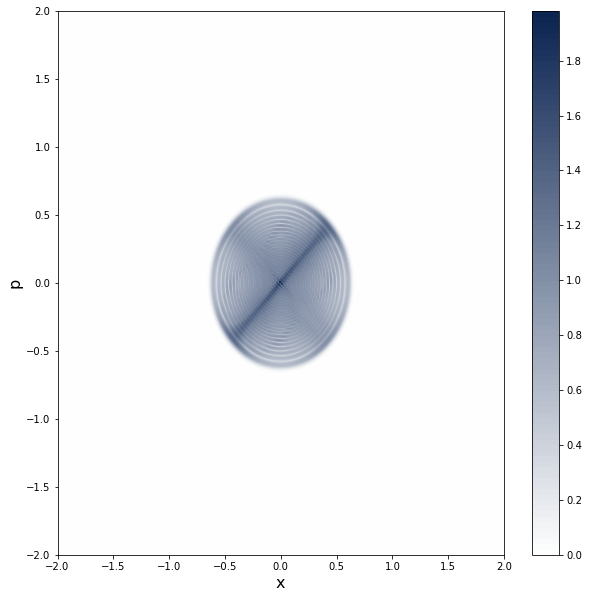

In [26]:
wmap=wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
plt.figure(figsize=(10,10))
plt.contourf(xvec,xvec,W,100,cmap=wmap)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.show()